Importing Libraries

In [25]:
import tensorflow as tensorflow
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

Data preprocessing

In [26]:
training_set = tensorflow.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 57765 files belonging to 38 classes.


Validation Image Preprocessing


In [27]:
validation_set = tensorflow.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17571 files belonging to 38 classes.


In [28]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [29]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[176.5  169.5  185.5 ]
   [173.25 166.25 182.25]
   [175.   168.   184.  ]
   ...
   [171.   167.   182.  ]
   [168.25 164.25 179.25]
   [165.25 161.25 176.25]]

  [[179.75 172.75 188.75]
   [175.25 168.25 184.25]
   [175.   168.   184.  ]
   ...
   [163.5  159.5  174.5 ]
   [176.   172.   187.  ]
   [178.25 174.25 189.25]]

  [[179.   172.   188.  ]
   [174.5  167.5  183.5 ]
   [174.25 167.25 183.25]
   ...
   [166.   162.   177.  ]
   [176.75 172.75 187.75]
   [170.   166.   181.  ]]

  ...

  [[149.   185.    97.25]
   [153.25 189.25 101.75]
   [145.75 181.75  94.75]
   ...
   [134.5  126.75 125.75]
   [144.   131.5  147.  ]
   [145.   129.5  153.  ]]

  [[146.   181.25  97.  ]
   [140.5  175.5   92.  ]
   [151.5  186.5  102.5 ]
   ...
   [224.   225.25 182.25]
   [212.25 207.5  177.5 ]
   [172.   164.   142.  ]]

  [[152.5  187.5  107.  ]
   [140.75 175.75  95.25]
   [151.5  186.5  104.5 ]
   ...
   [178.75 189.5   96.75]
   [176.5  182.    91.  ]
   [181.75 184.75  9

TO AVOID OVERSHOOTING
1. CHOOSE SMALL LEARNING RATE DEFAULT 0.001 WE ARE TAKING 0.0001.
2. THERE MAY BE CHANCE OF UNDERFITTING, SO INCREASE NUMBER OF NEURON FROM 1024 TO 1500.
3. ADD MORE CONVOLUTIONAL LAYER TO EXTRACT MORE FEATURE FROM IMAGES THERE MAY BE POSSIBILITY THAT MODEL UBABLE TO CAPTURE RELEVANT FEATURE OR MODEL IS CONFUSING DUE TO LACK OF FEATURE SO FEED WITH MORE FEATURE. 
4. TO AVOID OVERFITTING DROPOUT THE NUMBER OF NEURONS BY 0.25.
5. AVOID PADDING= SAME(IT MEANS THE INPUT SIZE OF IMAGE IS SAME FOR TRAINING IMAGE) FROM SECOND LAYER. IT HELPS US TO DECREASE THE SIZE OF THE MODEL. SO IN EARLY STAGE THE TOTAL PARAMETER IS 17058762 AFTER UPDATING THE PARAMETER ARE 7,842,762 (29.92MB).

Building Model

In [30]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [31]:
model=Sequential()

Building Convolutional layer

In [32]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\BIBHAV KUMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [35]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [36]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [37]:
model.add(Dropout(0.25))   # To avoid Overfitting 

In [38]:
model.add(Flatten())

In [39]:
model.add(Dense(units=1500,activation='relu'))

In [40]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

Compiling Model

In [41]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
training_history = model.fit(training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 948s 524ms/step - accuracy: 0.4769 - loss: 1.9141 - val_accuracy: 0.6966 - val_loss: 1.1280
Epoch 2/10
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 899s 498ms/step - accuracy: 0.8455 - loss: 0.4943 - val_accuracy: 0.7936 - val_loss: 0.8550
Epoch 3/10
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 898s 497ms/step - accuracy: 0.9046 - loss: 0.2889 - val_accuracy: 0.8455 - val_loss: 0.6636
Epoch 4/10
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 898s 497ms/step - accuracy: 0.9352 - loss: 0.1932 - val_accuracy: 0.8058 - val_loss: 0.8456
Epoch 5/10
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 896s 496ms/step - accuracy: 0.9532 - loss: 0.1425 - val_accuracy: 0.8663 - val_loss: 0.6410
Epoch 6/10
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 896s 496ms/step - accuracy: 0.9589 - loss: 0.1200 - val_accuracy: 0.8476 - val_loss: 0.8212
Epoch 7/10
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 897s 497ms/step - accuracy: 0.9682 - loss: 0.0938 - val_accuracy: 0.8700 - val_loss: 0.7569
Epoch 8/10
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 895s 496ms/step - ac

MODEL EVALUATION

In [45]:
# Model Evaluation on Training Set
train_loss,train_acc=model.evaluate(training_set)

1806/1806 ━━━━━━━━━━━━━━━━━━━━ 196s 109ms/step - accuracy: 0.9908 - loss: 0.0257


In [46]:
print(train_loss,train_acc)

0.0228203646838665 0.9921925067901611


In [47]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 60s 108ms/step - accuracy: 0.8903 - loss: 0.6337


In [48]:
print(val_loss,val_acc)

0.6276208162307739 0.8919811248779297


Saving Model

In [ ]:
model.save("trained_model.keras")    # UPDATED WAY TO SAVE OUR MODEL WITH (.Keras) EXTENSION

In [ ]:
training_history.history   # HISTORY AT EACH EPOCH VALUE 

{'accuracy': [0.6496840715408325,
  0.8648143410682678,
  0.9154678583145142,
  0.9402406215667725,
  0.9560979604721069,
  0.9634726643562317,
  0.9703972935676575,
  0.9758331179618835,
  0.9779278039932251,
  0.9808880686759949],
 'loss': [1.199960470199585,
  0.42550650238990784,
  0.25926926732063293,
  0.17917568981647491,
  0.1341765820980072,
  0.10798876732587814,
  0.08828258514404297,
  0.07433557510375977,
  0.06614775955677032,
  0.058137860149145126],
 'val_accuracy': [0.6966023445129395,
  0.7935803532600403,
  0.8455409407615662,
  0.8058164119720459,
  0.8662568926811218,
  0.8476467132568359,
  0.8699561953544617,
  0.8654032349586487,
  0.8368334174156189,
  0.8919811248779297],
 'val_loss': [1.1280150413513184,
  0.8549793362617493,
  0.6636295318603516,
  0.8456019163131714,
  0.6409624814987183,
  0.8211724758148193,
  0.7569109201431274,
  0.8371255397796631,
  0.9289427399635315,
  0.6276209354400635]}

In [51]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [52]:
training_history.history['val_accuracy']

[0.6966023445129395,
 0.7935803532600403,
 0.8455409407615662,
 0.8058164119720459,
 0.8662568926811218,
 0.8476467132568359,
 0.8699561953544617,
 0.8654032349586487,
 0.8368334174156189,
 0.8919811248779297]

Accuracy Visualization

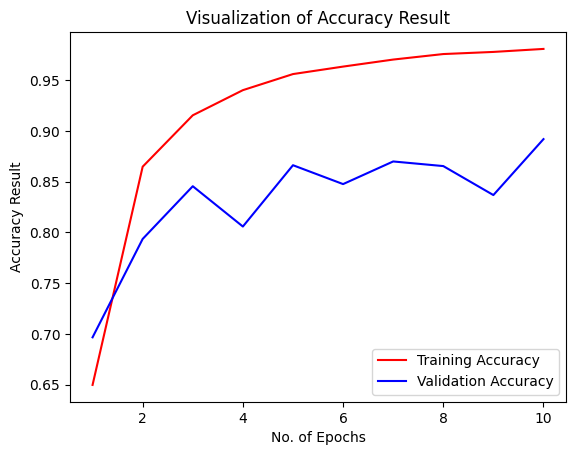

In [53]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

Some other metrics for model evaluation

In [54]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [56]:
test_set = tensorflow.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17571 files belonging to 38 classes.


In [58]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape           # probalility of all 38 class for each image and for each image it gives 38 probabilities.

550/550 ━━━━━━━━━━━━━━━━━━━━ 64s 116ms/step


(array([[9.9979717e-01, 1.2450699e-04, 2.7139246e-10, ..., 1.2946194e-14,
         1.0734333e-09, 2.6024287e-11],
        [9.0744770e-01, 8.5071281e-02, 7.3281408e-06, ..., 3.0383612e-10,
         1.3899488e-07, 1.2561316e-06],
        [9.9670225e-01, 1.0932980e-05, 1.5327813e-12, ..., 2.4858587e-15,
         1.6891709e-10, 2.1505731e-11],
        ...,
        [6.2879181e-12, 1.4744115e-13, 1.8915149e-12, ..., 6.5260536e-12,
         8.5923651e-13, 9.9999785e-01],
        [6.8886242e-12, 9.9913513e-13, 2.7949789e-13, ..., 6.4365002e-12,
         1.6899244e-12, 9.9999917e-01],
        [1.1886138e-13, 1.0959123e-15, 2.9799633e-16, ..., 1.4662170e-17,
         1.2547178e-13, 1.0000000e+00]], dtype=float32),
 (17571, 38))

In [ ]:
predicted_categories = tensorflow.argmax(y_pred,axis=1)        
# It takes the maximum probabilities from 
#each probability matrix of each leaves

In [ ]:
predicted_categories            

<tf.Tensor: shape=(17571,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [62]:
true_categories = tensorflow.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17571, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [64]:
Y_true = tensorflow.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17571,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

# calculate prcision, recall, f1-score,support

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.82      0.85       503
                                 Apple___Black_rot       0.71      0.96      0.82       497
                          Apple___Cedar_apple_rust       0.98      0.57      0.72       440
                                   Apple___healthy       0.92      0.92      0.92       502
                               Blueberry___healthy       0.95      0.92      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.91      0.98      0.94       421
                 Cherry_(including_sour)___healthy       0.89      0.98      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.65      0.76       410
                       Corn_(maize)___Common_rust_       0.72      1.00      0.84       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.95      0.

In [74]:
#Recording History in json
import json
with open("measureing_model.json","w") as f:
    json.dump(classification_report(Y_true,predicted_categories,target_names=class_name),f)

In [75]:
cm= confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

CONFUSION MATRIX VISUALIZATION

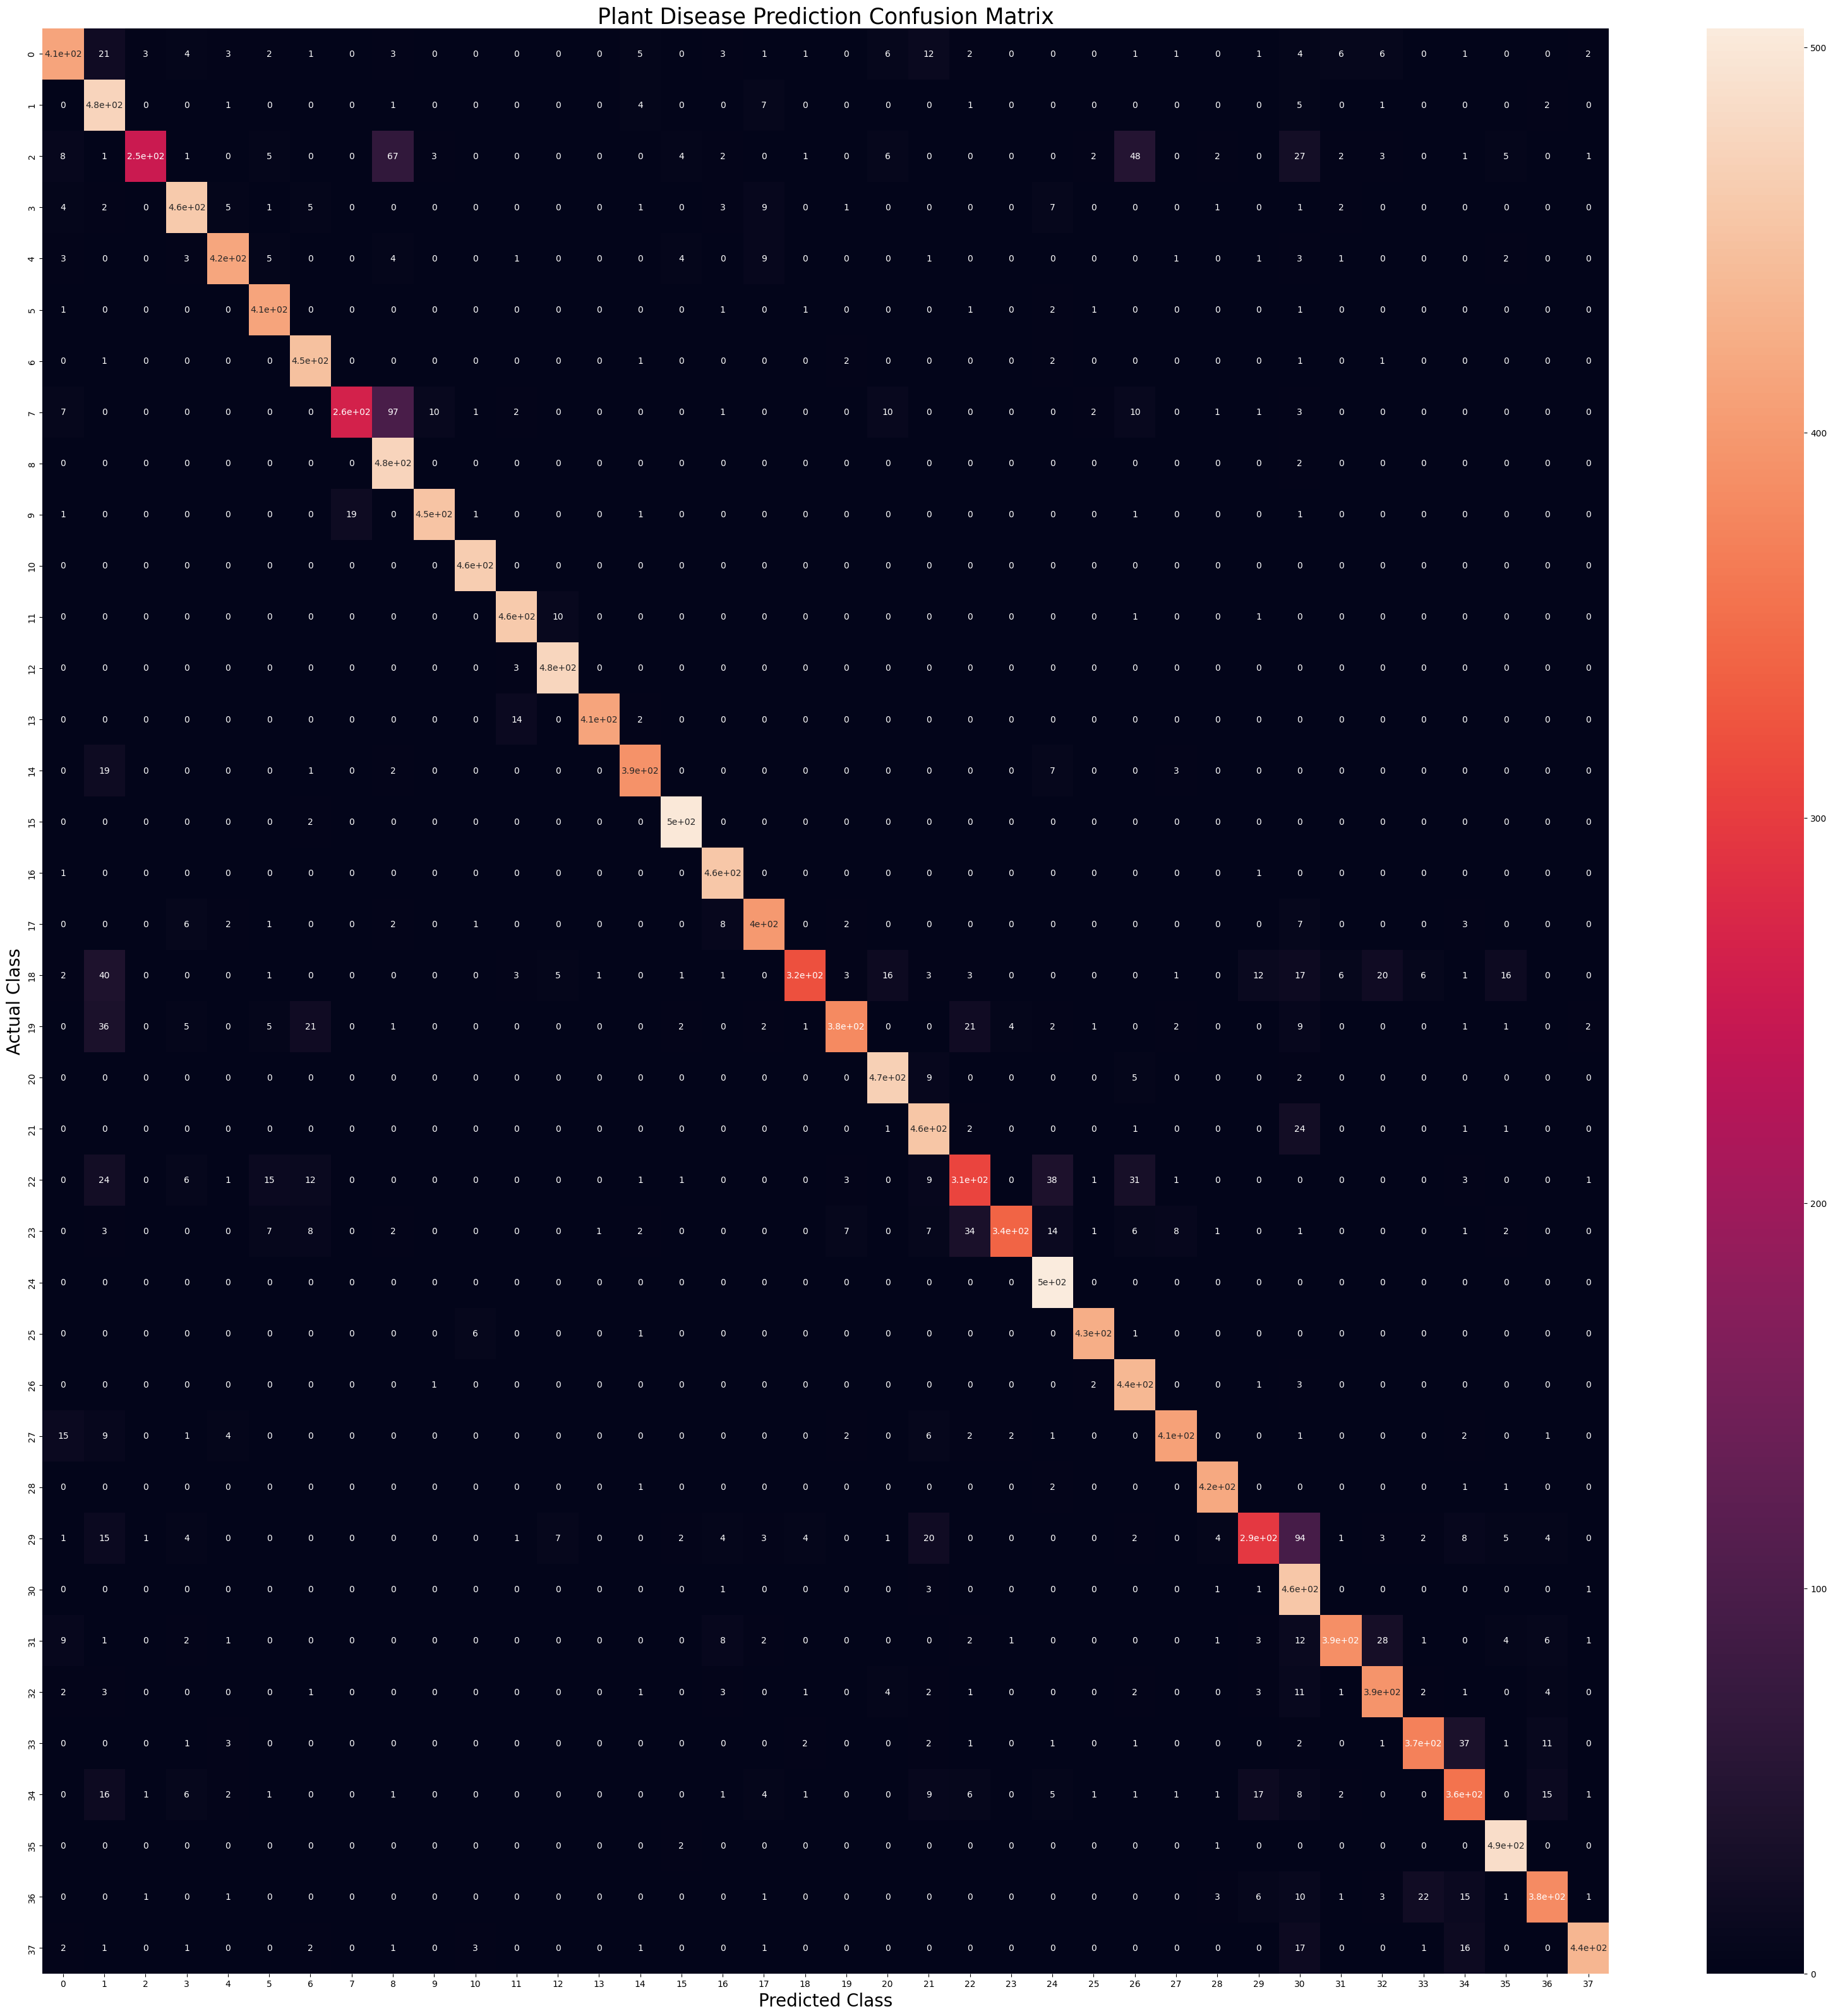

In [78]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()